# importing libraries

In [1]:
import pandas as pd #to perform analysis
import requests #to download html page
from bs4 import BeautifulSoup #to extract html data

# Extracting Netflix Stock Data using Scraping

We are using [marketwatch.com](https://www.marketwatch.com/) for scraping.

In [2]:
url = "https://www.marketwatch.com/investing/stock/nflx/download-data"
data  = requests.get(url).text

Creating Beautifulsoup object

In [3]:
soup = BeautifulSoup(data, 'html5lib')

## Creating a empty dataframe

In [4]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])
netflix_data

,Date,Open,High,Low,Close,Volume


**Now we are extracting data fro website**

In [5]:
table_rows =  soup.find("table", class_ = 'table table--overflow align--center').find('tbody')

In [6]:
for row in table_rows.find_all('tr'):

    column_date = row.find_all('td')[0].find('div').text
    column_open = table_rows.find_all('td')[1].text.replace("$","")
    column_high = table_rows.find_all('td')[2].text.replace("$","")
    column_low = table_rows.find_all('td')[3].text.replace("$","")
    column_close = table_rows.find_all('td')[4].text.replace("$","")
    column_volume = table_rows.find_all('td')[5].text.replace(",","")
    netflix_data = netflix_data.append({"Date":column_date, "Open":column_open, "High":column_high, "Low":column_low, "Close":column_close, "Volume":column_volume}, ignore_index=True)   

**Top 5 rows of data**

In [7]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume
0,08/18/2022,241.96,246.48,239.28,245.17,5280387
1,08/17/2022,241.96,246.48,239.28,245.17,5280387
2,08/16/2022,241.96,246.48,239.28,245.17,5280387
3,08/15/2022,241.96,246.48,239.28,245.17,5280387
4,08/12/2022,241.96,246.48,239.28,245.17,5280387


open = Open Price of stock = The price at which stock opened

close =Close price of stock = The price at which stock closed

High = The highest price the stock touched

Low = The lowest price the stock touched

**Checking rows and columns in dataframe**

In [8]:
netflix_data.shape

(20, 6)

**Changing index column**

In [9]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume
0,08/18/2022,241.96,246.48,239.28,245.17,5280387
1,08/17/2022,241.96,246.48,239.28,245.17,5280387
2,08/16/2022,241.96,246.48,239.28,245.17,5280387
3,08/15/2022,241.96,246.48,239.28,245.17,5280387
4,08/12/2022,241.96,246.48,239.28,245.17,5280387


Lets see our columns types

In [10]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Open    20 non-null     object
 2   High    20 non-null     object
 3   Low     20 non-null     object
 4   Close   20 non-null     object
 5   Volume  20 non-null     object
dtypes: object(6)
memory usage: 1.1+ KB


As you can see that the columns are object type means we cant perfrom any statistical operations.

**Converting to float and int**

In [11]:
netflix_data['Open'] = netflix_data['Open'].astype(float)
netflix_data['High'] = netflix_data['High'].astype(float)
netflix_data['Low'] = netflix_data['Low'].astype(float)
netflix_data['Close'] = netflix_data['Close'].astype(float)
netflix_data['Volume'] = netflix_data['Volume'].astype(int)

**Checking null values**

In [12]:
netflix_data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**Statistics**

In [13]:
netflix_data.mean()

C:\Users\Joshua\AppData\Local\Temp/ipykernel_14172/1153414984.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  netflix_data.mean()


Open          241.96
High          246.48
Low           239.28
Close         245.17
Volume    5280387.00
dtype: float64

In [14]:
netflix_data.max()

Date      08/18/2022
Open          241.96
High          246.48
Low           239.28
Close         245.17
Volume       5280387
dtype: object

In [15]:
netflix_data.mean()

C:\Users\Joshua\AppData\Local\Temp/ipykernel_14172/1153414984.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  netflix_data.mean()


Open          241.96
High          246.48
Low           239.28
Close         245.17
Volume    5280387.00
dtype: float64

In [16]:
netflix_data.describe()

,Open,High,Low,Close,Volume
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.0
mean,2.419600e+02,2.464800e+02,2.392800e+02,2.451700e+02,5280387.0
std,2.916006e-14,5.832012e-14,5.832012e-14,2.916006e-14,0.0
min,2.419600e+02,2.464800e+02,2.392800e+02,2.451700e+02,5280387.0
25%,2.419600e+02,2.464800e+02,2.392800e+02,2.451700e+02,5280387.0
50%,2.419600e+02,2.464800e+02,2.392800e+02,2.451700e+02,5280387.0
75%,2.419600e+02,2.464800e+02,2.392800e+02,2.451700e+02,5280387.0
max,2.419600e+02,2.464800e+02,2.392800e+02,2.451700e+02,5280387.0


<AxesSubplot:xlabel='Date'>

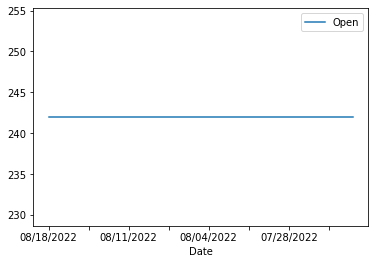

In [17]:
netflix_data.plot(x='Date',y='Open')